In [1]:
#importing the required packages
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat

In [2]:
#loading the given excel data
data = pd.read_csv('StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [3]:
#Filtering the required columns
Data = data.loc[:,['gender','parental level of education','test preparation course','math score','reading score','writing score']]

In [4]:
#creating dataframe using the given data
df = pd.DataFrame(Data)
df = df.rename(index = lambda x: x+1)
df.head()

,gender,parental level of education,test preparation course,math score,reading score,writing score
1,female,some high school,none,0,17,10
2,female,high school,none,8,24,23
3,female,some high school,none,18,32,28
4,female,some college,none,11,38,32
5,female,some college,none,22,39,33


# Number of males and females who participated in the test

In [5]:
Total_participants = df['gender'].value_counts()
Total_participants

female    518
male      482
Name: gender, dtype: int64

# Parental level of education

In [6]:
Parental_education = df['parental level of education'].value_counts()
Parental_education

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

# Students who scored most on average for math,reading and writing

In [7]:
#adding a column for average score
df['average score'] = (df['math score'] + df['reading score'] + df['writing score'])/3

Gender based

In [8]:
Avg_G= df.groupby('gender').mean()
Avg_G

,math score,reading score,writing score,average score
gender,,,,
female,63.376448,72.590734,72.467181,69.478121
male,68.821577,65.545643,63.446058,65.937759


Test preparation course based

In [9]:
Avg_TPC = df.groupby('test preparation course').mean()
Avg_TPC

,math score,reading score,writing score,average score
test preparation course,,,,
completed,69.96648,74.175978,74.684358,72.942272
none,63.78972,66.417445,64.457944,64.888370


# Scoring variation for math, reading and writing

Gender based

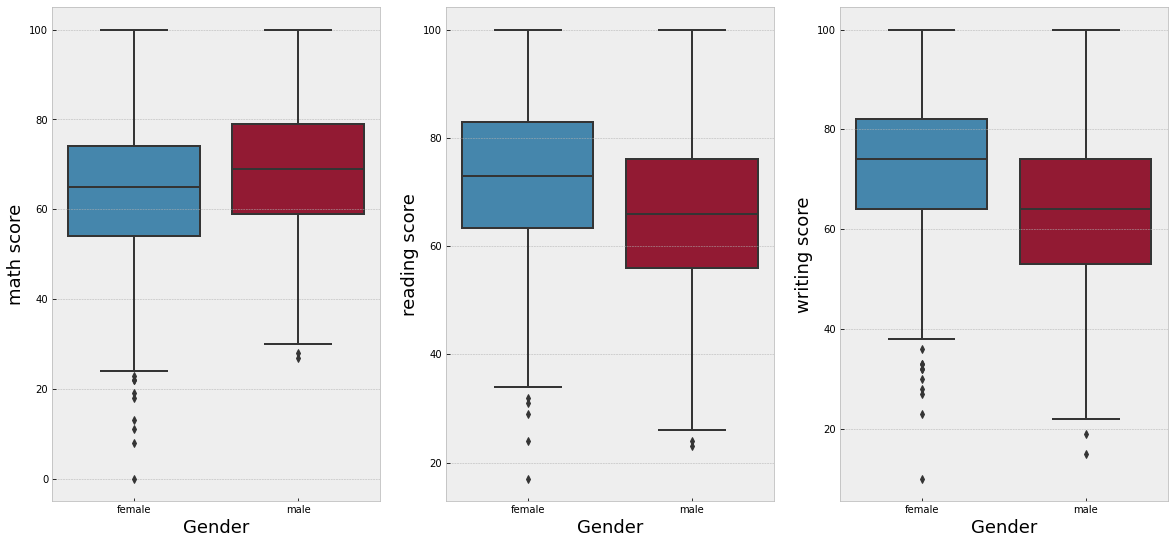

In [10]:
#setting the required plot style
plt.style.use('bmh')
#Defining a function graph()
def graph(y):
    sns.boxplot(x = 'gender', y = y , data = df)
    plt.xlabel('Gender', fontsize = 18)
    plt.ylabel( y, fontsize = 18)
plt.figure(figsize=(20,20))
#plotting subplots using the function graph()
plt.subplot(231)
graph('math score')
plt.subplot(232)
graph('reading score')
plt.subplot(233)
graph('writing score')
plt.show();

Test preparation course based

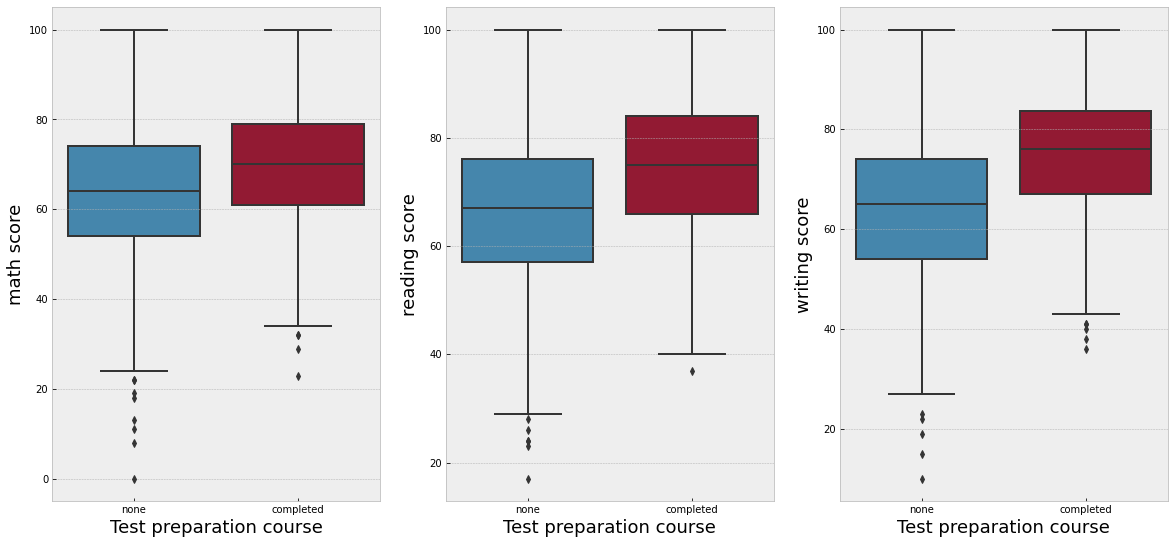

In [11]:
#setting the required plot style
plt.style.use('bmh')
#Defining a function graph()
def graph(y):
    sns.boxplot(x = 'test preparation course', y = y , data = df)
    plt.xlabel('Test preparation course', fontsize = 18)
    plt.ylabel( y, fontsize = 18)
plt.figure(figsize=(20,20))
#plotting subplots using the function graph()
plt.subplot(231)
graph('math score')
plt.subplot(232)
graph('reading score')
plt.subplot(233)
graph('writing score')
plt.show();

# Top 25% of students based on Math score

In [12]:
df.sort_values(by=['average score','math score'],ascending=False).head(250)

,gender,parental level of education,test preparation course,math score,reading score,writing score,average score
517,female,bachelor's degree,none,100,100,100,100.000000
518,female,associate's degree,none,100,100,100,100.000000
1000,male,bachelor's degree,completed,100,100,100,100.000000
514,female,bachelor's degree,completed,99,100,100,99.666667
513,female,some college,none,98,100,99,99.000000
...,...,...,...,...,...,...,...
867,male,some high school,none,79,82,73,78.000000
874,male,master's degree,none,79,78,77,78.000000
414,female,some college,none,76,78,80,78.000000
249,female,some college,completed,64,85,85,78.000000
